# Multiple Linear Regression Model(Ordinal Encoding)- Diamonds 

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv("Diamonds Prices2022.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df['clarity'].unique()
df['cut'].unique()
df['color'].unique()
print(df['color'].unique())
print(df['cut'].unique())
print(df['clarity'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


'One-Hot encode'.... The categorical variables are ordinal, we will use ordinal encoding

Note: In Ordinal encoding you dont need to drop a category for a baseline(n-1). Don't need ot worry about the dummy variable trap 

In [5]:
# Define the ordinal encoding mapping
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Replace the categorical column with the ordinal encoding
df['cut'] = df['cut'].map(cut_mapping)
df['color'] = df['color'].map(color_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)

# Now df will have the ordinal encoded columns

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,5,7,2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,4,6,3,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,4,5,3,59.8,62.0,2756,5.74,5.73,3.43


Measuring Linear association, numbers closer to -1,1 indicate a strong linear relationship

In [7]:
from scipy.stats import pearsonr
#Correlation coeffiecients
for column in ['carat','cut','color','clarity','depth','table','x','y','z']:
    corr, _ = pearsonr(df[column], df['price'])
    print(f'Pearson correlation between {column} and dependent_variable: {corr}')

Pearson correlation between carat and dependent_variable: 0.9215912778015916
Pearson correlation between cut and dependent_variable: -0.05348671454817575
Pearson correlation between color and dependent_variable: -0.1725196622868718
Pearson correlation between clarity and dependent_variable: -0.14679145884142356
Pearson correlation between depth and dependent_variable: -0.010630071383169506
Pearson correlation between table and dependent_variable: 0.1271178611937779
Pearson correlation between x and dependent_variable: 0.8844327693553832
Pearson correlation between y and dependent_variable: 0.8654186743718916
Pearson correlation between z and dependent_variable: 0.8612488101957437


Check to see if distibution is suitable for linear regression model

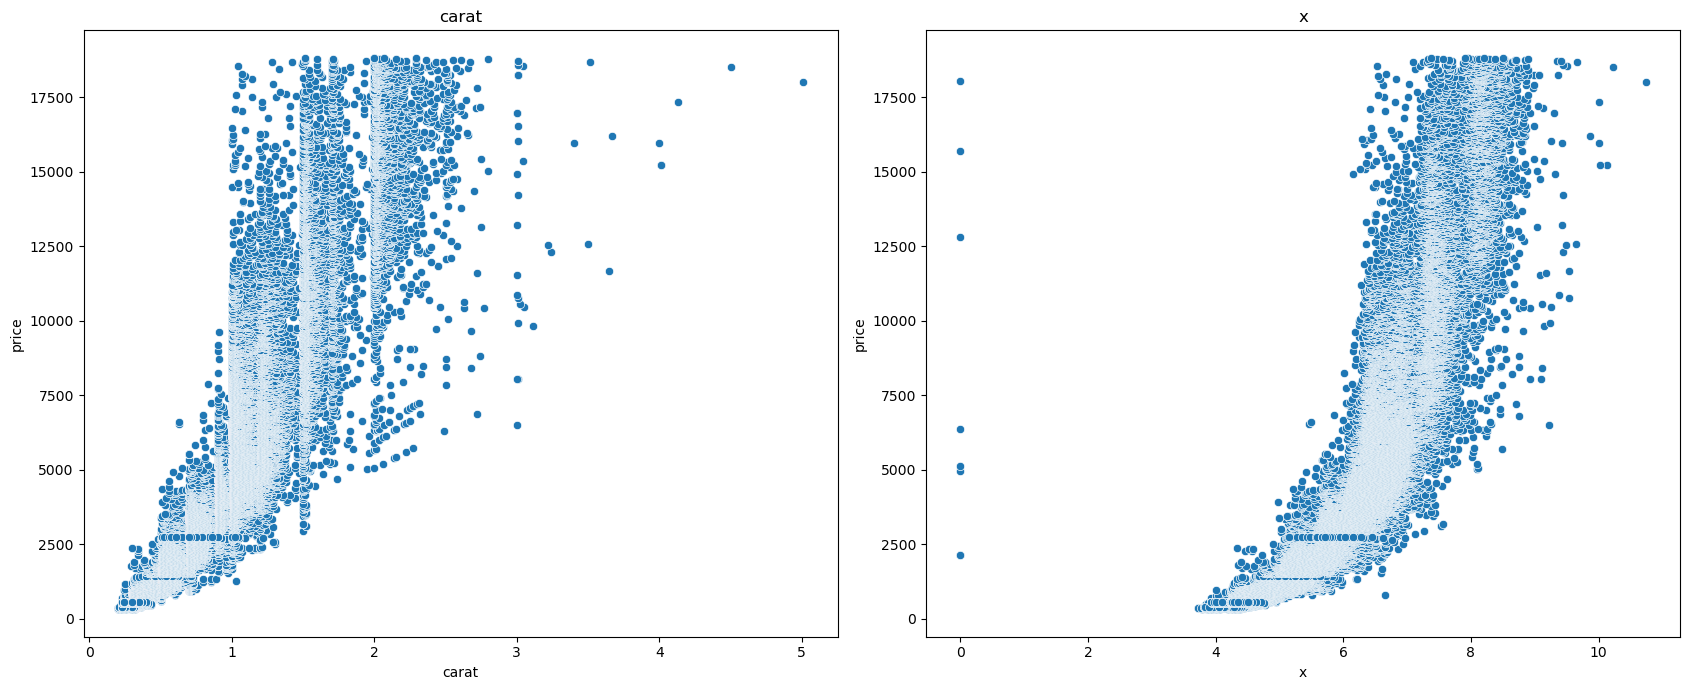

In [8]:
features = ['carat', 'x']

# Create a figure and axes beforehand
fig, axs = plt.subplots(1, 2, figsize=(17, 7))  # 1 row, 2 columns


# Iterate over the features and the axes simultaneously
for col, ax in zip(features, axs):
    # Use the ax argument to specify where to plot
    sb.scatterplot(data=df, x=col, y='price', ax=ax)
    ax.set_title(col)  # Set title for each subplot


plt.tight_layout()  # Adjust layout to not overlap plots
plt.show()

Checking for Multicollinarity and if Polynomials/interactions terms are a better option

1 means no correlation, 1-5 moderate correlation, 5+ effects predictive power

VIF is (Variance Inflation Factor)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['carat', 'x','clarity','color','cut']])

# Getting feature names for the polynomial features
feature_names = poly.get_feature_names_out(['carat', 'x','clarity','color','cut'])

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIFs
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X_poly, i) for i in range(X_poly.shape[1])]
vif_df['feature'] = feature_names

In [11]:
vif_df

,VIF,feature
0,1993.541128,carat
1,4609.983871,x
2,2150.615816,clarity
3,2050.167614,color
4,3032.166420,cut
5,421.625189,carat^2
6,3676.446508,carat x
7,546.952042,carat clarity
8,451.482082,carat color
9,670.578206,carat cut


In [12]:
#define the x and y variables
x=df[['carat', 'x','clarity','color','cut']]
y=df[['price']]

In [13]:
#split the data into train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [14]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (43154, 5)
x_test (10789, 5)
y_train (43154, 1)
y_test (10789, 1)


In [15]:
#Build the model sklearn
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# Predicting the Test set results
y_pred = model.predict(x_test)

In [17]:
# Calculating the Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9086071740191451


<Axes: xlabel='price'>

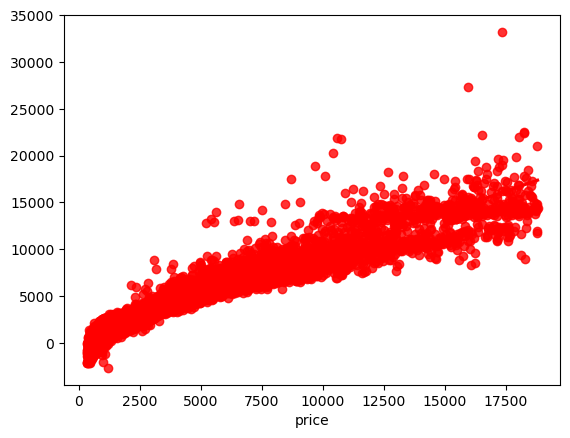

In [18]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [19]:
# create stastical summary.....
x = sm.add_constant(x)# Adds a constant term to the predictor
model = sm.OLS(y,x).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:16:37   Log-Likelihood:            -4.5992e+05
No. Observations:               53943   AIC:                         9.199e+05
Df Residuals:                   53937   BIC:                         9.199e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4233.2721     89.924    -47.076      0.0

# Conclusion

Model: 90.6% R-squared, indicator of a good model

Issues: VIF's are HUGE! Indicating multicollinearity but the Cond. No. in regression results is fairly low with no warning.

Conclusion: The model is good but the VIF needs to be addressed.